# Octave 7.1.0 on CoCalc

https://www.gnu.org/software/octave/news/release/2020/01/31/octave-5.2.0-released.html

In [1]:
version()


The gnuplot graphics toolkit is not actively maintained and has a number
of limitations that are unlikely to be fixed.  Communication with gnuplot
uses a one-directional pipe and limited information is passed back to the
Octave interpreter so most changes made interactively in the plot window
will not be reflected in the graphics properties managed by Octave.  For
example, if the plot window is closed with a mouse click, Octave will not
be notified and will not update its internal list of open figure windows.
The qt toolkit is recommended instead.



ans = 7.1.0


In [2]:
[2 3 4]' * [4 3 -1]

ans =

    8    6   -2
   12    9   -3
   16   12   -4



In [3]:
x = rand(3,3)^3

x =

   1.3095   0.6240   1.7322
   0.2901   0.1474   0.3930
   1.2244   0.5536   1.6003



In [4]:
function sqs = squares(n)
    # Compute the squares of the numbers from 1 to n.

    ### BEGIN SOLUTION
    # Put correct code here. This code is removed for the student version, but is
    # used to confirm that your tests are valid.
    if (n <= 0)
        error("n must be positive")
    endif
    sqs = (1:n).^2;
    ### END SOLUTION
endfunction

In [5]:
# [Modify the tests below for your own problem]
# Check that squares returns the correct output for several inputs:
assert(squares(1), [1])
assert(squares(2), [1 4])

### BEGIN HIDDEN TESTS
# students will NOT see these extra tests
assert(squares(10), [1 4 9 16 25 36 49 64 81 100])
### END HIDDEN TESTS

In [6]:
save r-octave.mat x -7

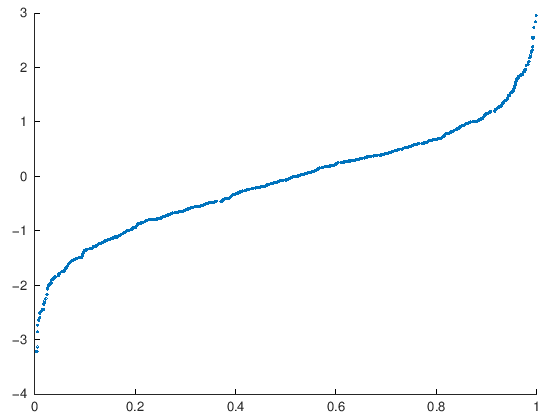

In [7]:
scatter(sort(rand(1000, 1)), sort(randn(1000, 1)))

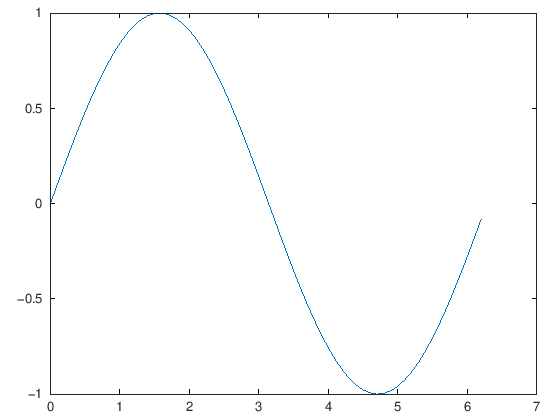

In [8]:
i = 0:.1:2*pi;
plot(i, sin(i))

In [9]:
pkg load dicom

error: package dicom is not installed
error: called from
    load_packages at line 47 column 7
    pkg at line 623 column 7


In [10]:
dicomuid()

error: 'dicomuid' undefined near line 1, column 1

The 'dicomuid' function belongs to the dicom package from Octave Forge
which seems to not be installed in your system.

Please read <https://www.octave.org/missing.html> to learn how you can
contribute missing functionality.


In [13]:
pkg load image

In [14]:
a = ones(100, 100);
b = ones(100, 100);
b(3, 1) = .5;
psnr(a, b)

ans = 46.021


This plot shows the famous 3D sombrero.

A quadratic meshgrid of $x$ and $y$ coordinates is evaluated via $\sqrt{x^2 + y^2} + \epsilon$ and the value $r$ is then the value plotted along the third dimension.

Reference: [3d plots](https://octave.org/doc/v4.2.2/Three_002dDimensional-Plots.html#Three_002dDimensional-Plots)

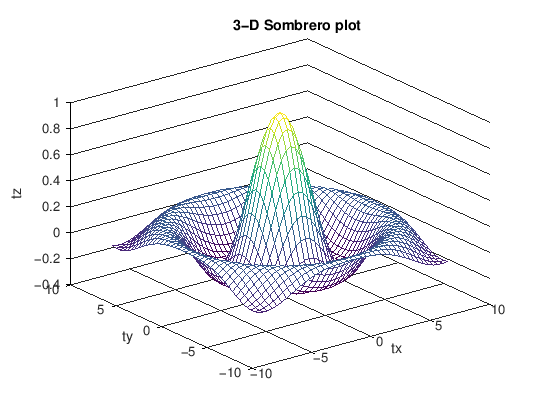

In [15]:
tx = ty = linspace (-8, 8, 41)';
[xx, yy] = meshgrid (tx, ty);
r = sqrt (xx .^ 2 + yy .^ 2) + eps;
tz = sin (r) ./ r;
mesh (tx, ty, tz);
xlabel ("tx");
ylabel ("ty");
zlabel ("tz");
title ("3-D Sombrero plot");

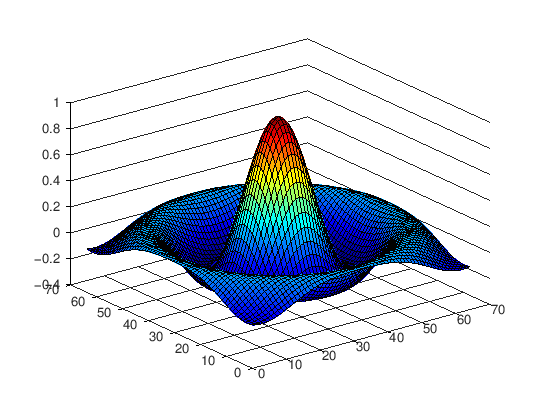

In [16]:
[x,y] = meshgrid(-16:0.5:16);
r = hypot(x,y)/2 + eps;
figure;
surf(sin(r)./r);
colormap(jet);

This draws the set of points, where the given equation is satisfied.
Here, it shows a tilted ellipse.

$$x^2 + 3 (y-1)^2 + \frac{x y}{2} = 6$$

Reference: [ezplot](https://octave.org/doc/v4.2.2/Two_002ddimensional-Function-Plotting.html#Two_002ddimensional-Function-Plotting)

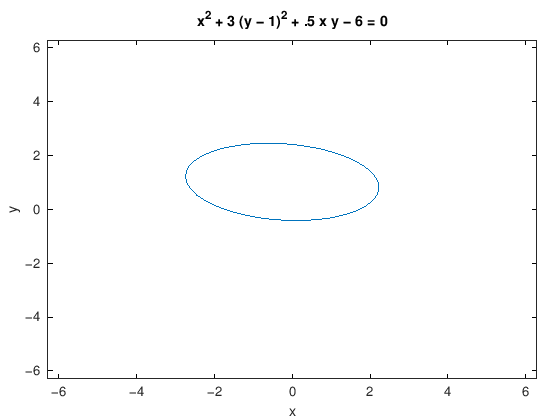

In [17]:
ezplot (@(x, y) x.^2 + 3 * (y - 1).^2 + .5 * x .* y - 6)

Imagine you want to evaluate a binary function $f(x,\,y) := x + 2 y$.

For evaluating it in vectorized notation, you need a grid for the cartesian product of all $x$ and $y$.

In [18]:
x = 0:3;
y = 0:4;
[xx, yy] = meshgrid(x, y);
xx + 2*yy

ans =

    0    1    2    3
    2    3    4    5
    4    5    6    7
    6    7    8    9
    8    9   10   11



## dsolve and sympy in symbolic

In [19]:
pkg load symbolic
syms y(x)
de = diff(y) == x;
f = dsolve(de, y(1) == 1)

/usr/local/lib/python3.8/dist-packages/sympy/__init__.py:672: SymPyDeprecationWarning: 

importing sympy.core.compatibility with 'from sympy import *' has been
deprecated since SymPy 1.6. Use import sympy.core.compatibility
instead. See https://github.com/sympy/sympy/issues/18245 for more
info.

  self.Warn(
Traceback (most recent call last):
  File "<stdin>", line 4, in <module>
  File "<stdin>", line 12, in octoutput_drv
  File "<stdin>", line 55, in octoutput
  File "/usr/local/lib/python3.8/dist-packages/sympy/__init__.py", line 677, in __getattr__
    return getattr(self.mod, name)
AttributeError: module 'sympy.core.compatibility' has no attribute 'integer_types'
error: Python exception: AttributeError: module 'sympy.core.compatibility' has no attribute 'integer_types'
    occurred while copying variables to Python.
    Try "sympref reset" and repeat your command?
    (consider filing an issue at https://github.com/cbm755/octsympy/issues)
error: called from
    pycall_sympy__ at l

error: 'dsolve' undefined near line 1, column 5

'dsolve' is a method of class 'sym'; it must be called with a 'sym'
argument (see 'help @sym/dsolve').

Please read <https://www.octave.org/missing.html> to learn how you can
contribute missing functionality.


## Octave's ODE PKG in Action

In [20]:
pkg load odepkg;

error: package odepkg is not installed
error: called from
    load_packages at line 47 column 7
    pkg at line 623 column 7


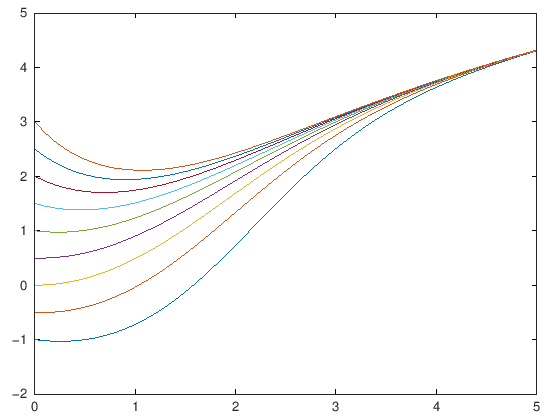

In [21]:
dxdt = @(t, x) - 0.24 * x.^2 + t;
tsteps = [0:0.1:5];
[t, x] = ode45(dxdt, tsteps, [-1:0.5:3]);
plot(t, x)

You can run numerical optimizations via the [optim](https://octave.sourceforge.io/optim/package_doc/index.html) package.

In this example we minimize the classical Rosenbrock function in 20 dimensions using BFGS.

In [22]:
pkg load optim;

function [obj_value, gradient] = objective(theta, location)
  x = theta - location + ones(rows(theta),1); # move minimizer to "location"
  [obj_value, gradient] = rosenbrock(x);
endfunction

dim = 20;                 # dimension of Rosenbrock function
theta0 = zeros(dim+1,1);  # starting values
location = (0:dim)/dim;   # true values
location = location';
control = {Inf,1};        # maxiters, verbosity

bfgsmin("objective", {theta0, location}, control);

Picked up _JAVA_OPTIONS: -Djava.io.tmpdir=/home/user/tmp -Xms64m

    bfgsmin at line 129 column 39

error: objective: function called with too many inputs
error: called from
    objective
    bfgsmin at line 129 column 39
